In [1]:
import numpy as np
import pandas as pd

import cv2

import matplotlib.pyplot as plt

### Load Image

In [2]:
profile = cv2.imread('data/profile.jpeg', cv2.IMREAD_UNCHANGED)

In [3]:
profile.shape

(960, 960, 3)

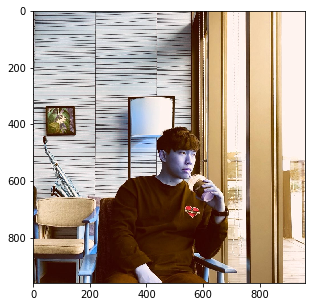

In [4]:
plt.figure(figsize=(5,5))


plt.imshow(profile)

### Make RGB Image to Gray Image

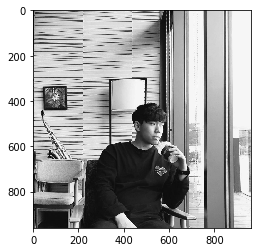

In [5]:
plt.imshow(np.mean(np.flip(profile, axis=2),axis=2).reshape((profile.shape[0],-1)), cmap='gray')

### Change Image size

In [6]:
profile = cv2.resize(profile, (1024, 1024))

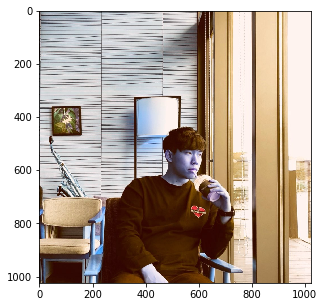

In [7]:
plt.figure(figsize=(5,5))

plt.imshow(profile)

In [8]:
row, col, chan = profile.shape

### Rotate Image and stack with flip by channel

In [9]:
a = np.stack((
    np.array(cv2.warpAffine(profile, cv2.getRotationMatrix2D((row/2, col/2), 0, 1), (row, col))),
    np.array(cv2.warpAffine(profile, cv2.getRotationMatrix2D((row/2, col/2), 90, 1), (row, col))),
    np.array(cv2.warpAffine(profile, cv2.getRotationMatrix2D((row/2, col/2), 180, 1), (row, col))),
    np.array(cv2.warpAffine(profile, cv2.getRotationMatrix2D((row/2, col/2), 270, 1), (row, col)))
 ),-1
)

In [10]:
a.shape

(1024, 1024, 3, 4)

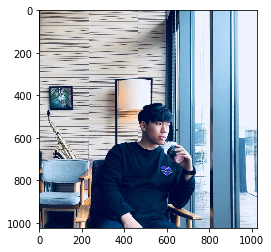

In [11]:
plt.imshow(np.flip(a[:,:,:,0],axis=2))

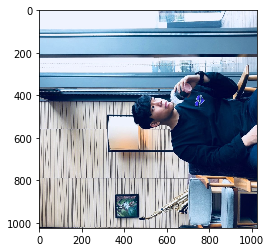

In [12]:
plt.imshow(np.flip(a[:,:,:,1],axis=2))

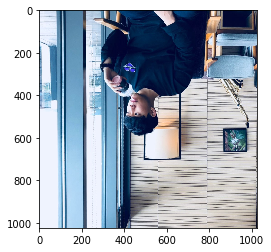

In [13]:
plt.imshow(np.flip(a[:,:,:,2],axis=2))

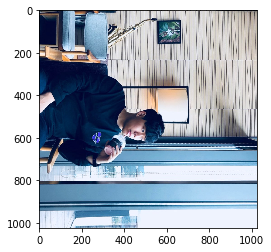

In [14]:
plt.imshow(np.flip(a[:,:,:,3], axis=2))

### Affine Transformation
선의 평행성은 유지하면서, 이미지를 변환하는 연산을 어파인 변환이라고 한다.

In [15]:
# 3개의 Match되는 점이 있으면 된다고함.
pts1 = np.float32([[200,300], [400,200], [200,400]])
pts2 = np.float32([[200,100], [400,100], [200,200]])

# 3개의 Match되는 점 리스트 2개를 가지고 어파인 변환 행렬을 찾는다(get).
# [200,300] 점이 -> [200,100] 이 되고,
# [400,200] 점이 -> [400,100] 이 되고,
# [200,400] 점이 -> [200,200] 이 되는 변환 행렬을 찾는 것.
M = cv2.getAffineTransform(pts1, pts2)

# 이미지에 어파인 변환 행렬을 적용한다. (col, row)는 이미지의 크기인듯
dst = cv2.warpAffine(profile, M, (col, row))

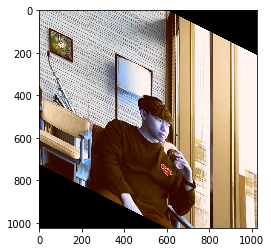

In [16]:
plt.imshow(dst)

### Perspective Transformation
원근법 변환이라는데, 두개의 평행한 직선에 원근법을 적용해서 멀어질수록 한 점에서 만나게 되도록 변환. 그 반대도 가능하다고 함.

In [17]:
# x,y 좌표점을 좌상,좌하,우상,우하 순서로 결정해야 한다고함
pts1 = np.float32([[300, 600], [150, 1000], [800, 800], [700,1024]])
pts2 = np.float32([[10, 10], [10,1000], [1000,0], [1000,1000]])

M = cv2.getPerspectiveTransform(pts1, pts2)

dst = cv2.warpPerspective(profile, M, (1024,1024))

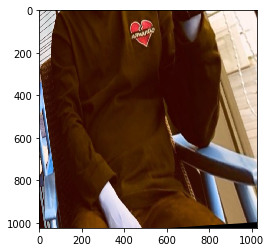

In [18]:
plt.imshow(dst)